In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Without signal. This is purely an observation from intraday return.

In [2]:
intraday = pd.read_csv('./data/intraday return/SP 100 - Intraday Return.csv',index_col = 0, header=[0,1])

In [3]:
intraday = intraday.stack()

selected = [i for i in intraday.columns if i!='META']

intraday = intraday[selected]
intraday

Day                   AAPL      ABBV       ABT       ACN      ADBE       AIG  \
2010-01-04 09:30  0.002625       NaN  0.003322  0.009152  0.012005 -0.030789   
           09:45  0.000000       NaN  0.002584  0.009393  0.010914 -0.026531   
           10:00 -0.002625       NaN  0.003322  0.008911  0.009550 -0.027841   
           10:15  0.001312       NaN  0.003691  0.006985  0.011733 -0.031444   
           10:30  0.001312       NaN  0.002584  0.009152  0.012824 -0.027186   
...                    ...       ...       ...       ...       ...       ...   
2022-12-30 14:45 -0.001012 -0.009431 -0.006284 -0.007042 -0.001351 -0.003952   
           15:00  0.004361 -0.006287 -0.003188 -0.000753  0.004204 -0.001739   
           15:15  0.003894 -0.007150 -0.002641 -0.002034  0.003754 -0.003320   
           15:30  0.005062 -0.005178 -0.000911  0.000640  0.004234 -0.001265   
           15:45  0.011837 -0.003205  0.000273  0.004896  0.010601 -0.000316   

Day                    AMD      AMGN       AMT      AMZN  ...       UNH  \
2010-01-04 09:30  0.004086  0.011831  0.006898 -0.004405  ... -0.004779   
           09:45  0.005107  0.014480  0.006898  0.000000  ... -0.007009   
           10:00  0.003064  0.015893  0.003909 -0.010279  ... -0.006690   
           10:15  0.008172  0.016069  0.004599 -0.010279  ... -0.004141   
           10:30  0.011236  0.015363  0.002529 -0.013216  ... -0.004779   
...                    ...       ...       ...       ...  ...       ...   
2022-12-30 14:45  0.001725 -0.009744 -0.023935 -0.005895  ... -0.005528   
           15:00  0.005959 -0.006318 -0.018056 -0.001203  ... -0.002755   
           15:15  0.005175 -0.006813 -0.016843 -0.002045  ... -0.002774   
           15:30  0.007370 -0.005595 -0.014697  0.000481  ... -0.002245   
           15:45  0.015681 -0.000343 -0.011524  0.010587  ...  0.000340   

Day                    UNP       UPS       USB         V        VZ       WBA  \
2010-01-04 09:30 -0.000620  0.004827 -0.000442 -0.001818 -0.000899       NaN   
           09:45  0.002169  0.012929  0.003540 -0.002273 -0.001799       NaN   
           10:00  0.004648  0.009826  0.001327  0.000000 -0.002398       NaN   
           10:15  0.005888  0.008964  0.004425  0.003182 -0.003897       NaN   
           10:30  0.005888  0.010343  0.003982  0.004545 -0.005096       NaN   
...                    ...       ...       ...       ...       ...       ...   
2022-12-30 14:45 -0.012857 -0.012108 -0.000691  0.000436 -0.005342 -0.006176   
           15:00 -0.008908 -0.007862  0.001152  0.004702 -0.002289 -0.004028   
           15:15 -0.010016 -0.008608  0.000691  0.003393 -0.000763 -0.003759   
           15:30 -0.006212 -0.005681  0.002535  0.005332  0.002544 -0.002417   
           15:45 -0.002889 -0.002755  0.005069  0.007464  0.002289  0.003222   

Day                    WFC       WMT       XOM  
2010-01-04 09:30  0.000370  0.006889  0.000728  
           09:45  0.000740  0.006144  0.000873  
           10:00 -0.000370  0.004282  0.002328  
           10:15  0.005551  0.004096  0.003492  
           10:30  0.002961  0.005586  0.002765  
...                    ...       ...       ...  
2022-12-30 14:45 -0.001946 -0.004733  0.011417  
           15:00  0.001459 -0.001837  0.012982  
           15:15  0.000000 -0.001766  0.012154  
           15:30  0.002432 -0.000212  0.014547  
           15:45  0.004622  0.001625  0.015744  

[84793 rows x 100 columns]

In [4]:
temp = intraday.count(axis=1).unstack().reset_index()
temp['year'] = pd.to_datetime(temp['index']).dt.year
temp.groupby('year').mean()

,09:30,09:45,10:00,10:15,10:30,10:45,11:00,11:15,11:30,11:45,...,13:30,13:45,14:00,14:15,14:30,14:45,15:00,15:15,15:30,15:45
year,,,,,,,,,,,,,,,,,,,,,
2010,87.408730,87.345238,87.345238,87.349206,87.341270,87.333333,87.333333,87.337302,87.353175,87.333333,...,86.984127,86.980159,87.354582,87.338645,87.342629,87.358566,87.342629,87.342629,87.362550,87.382470
2011,89.976190,89.948413,89.964286,89.960317,89.960317,89.964286,89.964286,89.956349,89.968254,89.976190,...,89.968127,89.964143,89.968127,89.972112,89.968127,89.968127,89.972112,89.976096,89.976096,89.976096
2012,90.236000,90.236000,90.236000,90.236000,90.236000,90.236000,90.236000,90.236000,90.236000,90.236000,...,90.230769,90.226721,90.226721,90.222672,90.222672,90.222672,90.226721,90.230769,90.230769,90.230769
2013,92.674603,92.674603,92.674603,92.674603,92.674603,92.674603,92.674603,92.673307,92.673307,92.673307,...,92.626506,92.618474,92.586345,92.586345,92.586345,92.586345,92.586345,92.670683,92.670683,92.670683
2014,93.773810,93.769841,93.769841,93.773810,93.761905,93.773810,93.769841,93.769841,93.773810,93.769841,...,93.767068,93.767068,93.767068,93.763052,93.763052,93.767068,93.763052,93.759036,93.763052,93.771084
2015,95.948413,95.948413,95.948413,95.948413,95.948413,95.948413,95.948413,95.948413,95.948413,95.948413,...,95.940000,95.940000,95.940000,95.940000,95.940000,95.940000,95.940000,95.940000,95.940000,95.940000
2016,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,...,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
2017,96.996016,96.992032,96.992032,96.992032,96.996016,96.996016,96.992032,96.992032,96.992032,96.992032,...,96.991968,96.995984,96.995984,96.995984,96.995984,96.995984,96.995984,96.995984,96.995984,96.995984
2018,97.163347,97.163347,97.163347,97.163347,97.163347,97.163347,97.163347,97.163347,97.159363,97.163347,...,97.157258,97.157258,97.157258,97.153226,97.153226,97.153226,97.153226,97.153226,97.153226,97.157258


In [5]:
intraday2 = intraday.stack().reset_index()
intraday2.columns = ['Day','Time','Symbol','Open_to_Date_Return']
intraday2['year'] = pd.to_datetime(intraday2['Day']).dt.year

In [6]:
intraday_summary = intraday2.groupby(['year','Time']).describe().droplevel(0,axis=1)[['mean','std','min','max']].unstack()

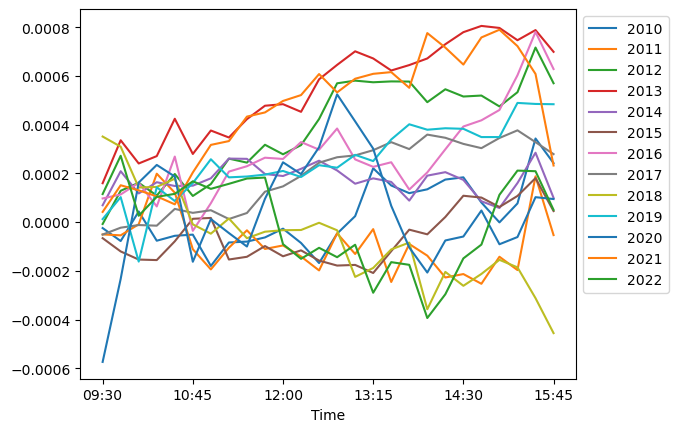

In [7]:
intraday_summary['mean'].T.plot().legend(bbox_to_anchor=(1, 1))

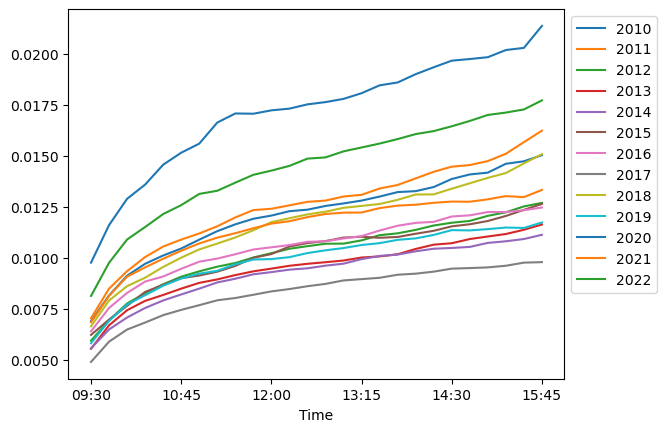

In [8]:
intraday_summary['std'].T.plot().legend(bbox_to_anchor=(1, 1))

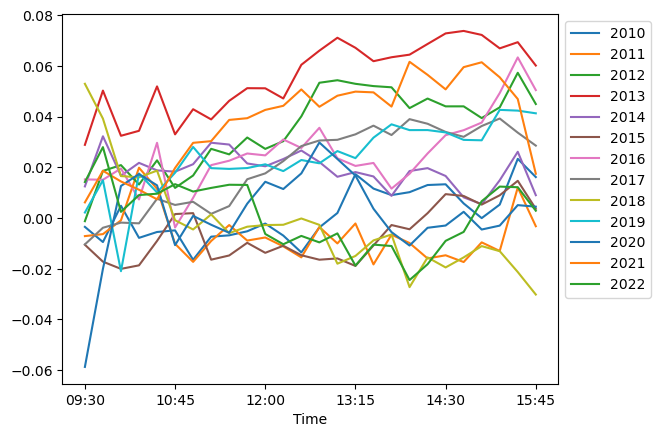

In [9]:
(intraday_summary['mean']/intraday_summary['std']).T.plot().legend(bbox_to_anchor=(1, 1))

In [11]:
# intraday_summary['min'].T.plot()

In [12]:
# intraday_summary['max'].T.plot()

### With Signal.

In [10]:
signals = pd.read_csv('./signals/Open Gap Signals/SP 100/sp100_signal_100rolling_80lvl.csv',index_col=0)

selected_signals = [i for i in signals.columns if i!='META']

signals = signals[selected_signals]
signals.replace(0,np.nan,inplace=True)

In [11]:
signals

,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2010-05-27,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0
2010-05-28,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-01,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2010-06-02,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0
2010-06-03,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-21,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0
2022-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
intraday

Day                   AAPL      ABBV       ABT       ACN      ADBE       AIG  \
2010-01-04 09:30  0.002625       NaN  0.003322  0.009152  0.012005 -0.030789   
           09:45  0.000000       NaN  0.002584  0.009393  0.010914 -0.026531   
           10:00 -0.002625       NaN  0.003322  0.008911  0.009550 -0.027841   
           10:15  0.001312       NaN  0.003691  0.006985  0.011733 -0.031444   
           10:30  0.001312       NaN  0.002584  0.009152  0.012824 -0.027186   
...                    ...       ...       ...       ...       ...       ...   
2022-12-30 14:45 -0.001012 -0.009431 -0.006284 -0.007042 -0.001351 -0.003952   
           15:00  0.004361 -0.006287 -0.003188 -0.000753  0.004204 -0.001739   
           15:15  0.003894 -0.007150 -0.002641 -0.002034  0.003754 -0.003320   
           15:30  0.005062 -0.005178 -0.000911  0.000640  0.004234 -0.001265   
           15:45  0.011837 -0.003205  0.000273  0.004896  0.010601 -0.000316   

Day                    AMD      AMGN       AMT      AMZN  ...       UNH  \
2010-01-04 09:30  0.004086  0.011831  0.006898 -0.004405  ... -0.004779   
           09:45  0.005107  0.014480  0.006898  0.000000  ... -0.007009   
           10:00  0.003064  0.015893  0.003909 -0.010279  ... -0.006690   
           10:15  0.008172  0.016069  0.004599 -0.010279  ... -0.004141   
           10:30  0.011236  0.015363  0.002529 -0.013216  ... -0.004779   
...                    ...       ...       ...       ...  ...       ...   
2022-12-30 14:45  0.001725 -0.009744 -0.023935 -0.005895  ... -0.005528   
           15:00  0.005959 -0.006318 -0.018056 -0.001203  ... -0.002755   
           15:15  0.005175 -0.006813 -0.016843 -0.002045  ... -0.002774   
           15:30  0.007370 -0.005595 -0.014697  0.000481  ... -0.002245   
           15:45  0.015681 -0.000343 -0.011524  0.010587  ...  0.000340   

Day                    UNP       UPS       USB         V        VZ       WBA  \
2010-01-04 09:30 -0.000620  0.004827 -0.000442 -0.001818 -0.000899       NaN   
           09:45  0.002169  0.012929  0.003540 -0.002273 -0.001799       NaN   
           10:00  0.004648  0.009826  0.001327  0.000000 -0.002398       NaN   
           10:15  0.005888  0.008964  0.004425  0.003182 -0.003897       NaN   
           10:30  0.005888  0.010343  0.003982  0.004545 -0.005096       NaN   
...                    ...       ...       ...       ...       ...       ...   
2022-12-30 14:45 -0.012857 -0.012108 -0.000691  0.000436 -0.005342 -0.006176   
           15:00 -0.008908 -0.007862  0.001152  0.004702 -0.002289 -0.004028   
           15:15 -0.010016 -0.008608  0.000691  0.003393 -0.000763 -0.003759   
           15:30 -0.006212 -0.005681  0.002535  0.005332  0.002544 -0.002417   
           15:45 -0.002889 -0.002755  0.005069  0.007464  0.002289  0.003222   

Day                    WFC       WMT       XOM  
2010-01-04 09:30  0.000370  0.006889  0.000728  
           09:45  0.000740  0.006144  0.000873  
           10:00 -0.000370  0.004282  0.002328  
           10:15  0.005551  0.004096  0.003492  
           10:30  0.002961  0.005586  0.002765  
...                    ...       ...       ...  
2022-12-30 14:45 -0.001946 -0.004733  0.011417  
           15:00  0.001459 -0.001837  0.012982  
           15:15  0.000000 -0.001766  0.012154  
           15:30  0.002432 -0.000212  0.014547  
           15:45  0.004622  0.001625  0.015744  

[84793 rows x 100 columns]

In [13]:
intraday.loc[(signals.index,slice(None))].unstack()

Day             AAPL                                                    \
               09:30     09:45     10:00     10:15     10:30     10:45   
2010-05-27 -0.001117 -0.002235  0.001117  0.002235 -0.001117 -0.001117   
2010-05-28 -0.010799 -0.005400 -0.005400 -0.006479 -0.008639 -0.011879   
2010-06-01  0.007551  0.006472  0.012945  0.019417  0.017260  0.016181   
2010-06-02 -0.008466 -0.007407 -0.006349 -0.006349 -0.008466 -0.008466   
2010-06-03 -0.003168 -0.004224 -0.008448 -0.010560 -0.010560 -0.006336   
...              ...       ...       ...       ...       ...       ...   
2022-12-21  0.004061  0.004211  0.011280  0.014363  0.021357  0.027297   
2022-12-23 -0.002444 -0.006874 -0.003437  0.003590  0.007027 -0.000382   
2022-12-27 -0.010199 -0.015527 -0.016289 -0.009210 -0.010352 -0.011722   
2022-12-28  0.005244  0.002468  0.003085 -0.000077 -0.002622 -0.012416   
2022-12-29  0.009766  0.005938  0.004688  0.010938  0.011407  0.015314   

Day                                                 ...       XOM            \
               11:00     11:15     11:30     11:45  ...     13:30     13:45   
2010-05-27  0.000000  0.001117  0.001117  0.001117  ...  0.008926  0.006281   
2010-05-28 -0.015119 -0.016199 -0.015119 -0.015119  ... -0.005391 -0.008005   
2010-06-01  0.016181  0.016181  0.014024  0.011866  ...  0.005466  0.000828   
2010-06-02 -0.007407 -0.007407 -0.006349 -0.006349  ...  0.009410  0.007394   
2010-06-03 -0.005280 -0.007392 -0.006336 -0.008448  ... -0.001306 -0.002612   
...              ...       ...       ...       ...  ...       ...       ...   
2022-12-21  0.024741  0.022259  0.021582  0.019176  ... -0.002401  0.000554   
2022-12-23 -0.000535  0.000687  0.002826 -0.000306  ...  0.013745  0.013090   
2022-12-27 -0.015451 -0.012559 -0.010352 -0.010884  ...  0.009792  0.008786   
2022-12-28 -0.016195 -0.015809 -0.018200 -0.023521  ... -0.012101 -0.010463   
2022-12-29  0.012032  0.014532  0.015001  0.016486  ...  0.012223  0.012501   

Day                                                                     \
               14:00     14:15     14:30     14:45     15:00     15:15   
2010-05-27  0.011901  0.012066  0.009752  0.008760  0.009421  0.007438   
2010-05-28 -0.009149 -0.007188 -0.006045 -0.002777 -0.002777 -0.000653   
2010-06-01 -0.001822 -0.001325 -0.002816 -0.004141 -0.005963 -0.010933   
2010-06-02  0.006554  0.007730  0.013611  0.013275  0.016132  0.016972   
2010-06-03  0.000653  0.003918  0.006204  0.003755  0.003755  0.006041   
...              ...       ...       ...       ...       ...       ...   
2022-12-21  0.001755  0.000185  0.000739  0.000185  0.000000 -0.002586   
2022-12-23  0.010285  0.011220  0.011781  0.012903  0.013745  0.013651   
2022-12-27  0.007230  0.004667  0.005399  0.006498  0.007687  0.009243   
2022-12-28 -0.013011 -0.012738 -0.007552 -0.010372 -0.013557 -0.016741   
2022-12-29  0.015279  0.014538  0.014909  0.014631  0.014353  0.013520   

Day                             
               15:30     15:45  
2010-05-27  0.011240  0.016364  
2010-05-28  0.000327 -0.012253  
2010-06-01 -0.013583 -0.019380  
2010-06-02  0.017140  0.020837  
2010-06-03  0.007020  0.004898  
...              ...       ...  
2022-12-21 -0.001200 -0.002493  
2022-12-23  0.014306  0.016269  
2022-12-27  0.009426  0.008420  
2022-12-28 -0.016468 -0.014284  
2022-12-29  0.012872  0.011390  

[2955 rows x 2600 columns]

In [14]:
# redo pnl calculation
strat_pnl = intraday.loc[(signals.index,slice(None))].unstack().multiply(signals,level=0,axis=1).stack().stack().reset_index()
strat_pnl.columns = ['Day','Time','Symbol','Open_to_Date_Return']
strat_pnl['year'] = pd.to_datetime(strat_pnl['Day']).dt.year

In [15]:
strat_pnl["Open_to_Date_Return"].describe()

count    1.665876e+06
mean     1.257570e-04
std      1.305036e-02
min     -2.000000e-01
25%     -6.138107e-03
50%      0.000000e+00
75%      6.523408e-03
max      2.709998e-01
Name: Open_to_Date_Return, dtype: float64

In [17]:
strat_pnl.loc[strat_pnl['Symbol']=='AAPL']

,Day,Time,Symbol,Open_to_Date_Return,year
0,2010-05-27,09:30,AAPL,-0.001117,2010
83,2010-05-27,09:45,AAPL,-0.002235,2010
166,2010-05-27,10:00,AAPL,0.001117,2010
249,2010-05-27,10:15,AAPL,0.002235,2010
332,2010-05-27,10:30,AAPL,-0.001117,2010
...,...,...,...,...,...
1665666,2022-12-29,14:45,AAPL,0.013985,2022
1665708,2022-12-29,15:00,AAPL,0.013985,2022
1665750,2022-12-29,15:15,AAPL,0.015314,2022
1665792,2022-12-29,15:30,AAPL,0.016173,2022


In [18]:
df2 = signals["AAPL"]
df2 = df2.reset_index()
df2

,Date,AAPL
0,2010-05-27,1.0
1,2010-05-28,1.0
2,2010-06-01,1.0
3,2010-06-02,1.0
4,2010-06-03,NaN
...,...,...
2950,2022-12-21,NaN
2951,2022-12-23,NaN
2952,2022-12-27,NaN
2953,2022-12-28,NaN


In [19]:
df1 = intraday["AAPL"].reset_index()
df1 = df1.rename(columns={"level_0":"Date"})
df1

,Date,level_1,AAPL
0,2010-01-04,09:30,0.002625
1,2010-01-04,09:45,0.000000
2,2010-01-04,10:00,-0.002625
3,2010-01-04,10:15,0.001312
4,2010-01-04,10:30,0.001312
...,...,...,...
84788,2022-12-30,14:45,-0.001012
84789,2022-12-30,15:00,0.004361
84790,2022-12-30,15:15,0.003894
84791,2022-12-30,15:30,0.005062


In [20]:
df3 = pd.merge(df1,df2, on="Date", how="left")
df3["ret"] = df3["AAPL_x"]*df3["AAPL_y"]
df3

,Date,level_1,AAPL_x,AAPL_y,ret
0,2010-01-04,09:30,0.002625,NaN,NaN
1,2010-01-04,09:45,0.000000,NaN,NaN
2,2010-01-04,10:00,-0.002625,NaN,NaN
3,2010-01-04,10:15,0.001312,NaN,NaN
4,2010-01-04,10:30,0.001312,NaN,NaN
...,...,...,...,...,...
84788,2022-12-30,14:45,-0.001012,NaN,NaN
84789,2022-12-30,15:00,0.004361,NaN,NaN
84790,2022-12-30,15:15,0.003894,NaN,NaN
84791,2022-12-30,15:30,0.005062,NaN,NaN


<Axes: >

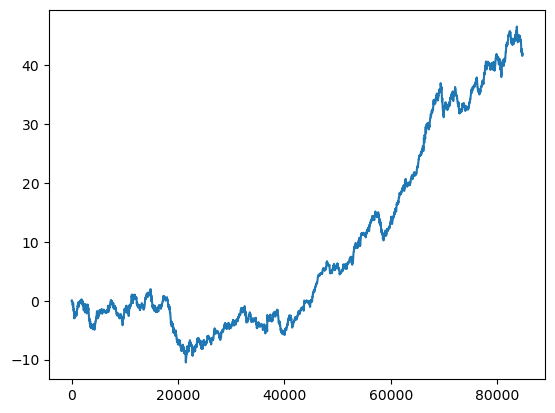

In [46]:
df3["AAPL_x"].cumsum().plot()

<Axes: >

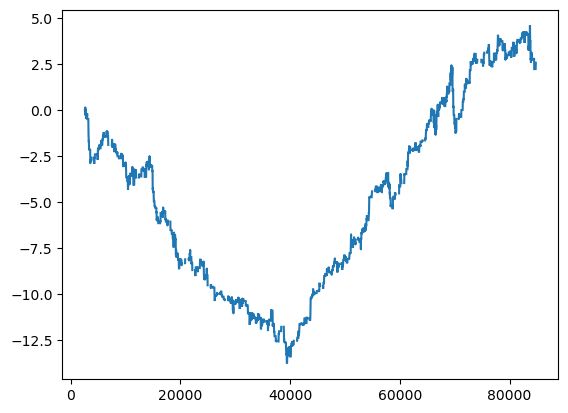

In [21]:
df3["ret"].cumsum().plot()

In [32]:
test = pd.read_csv('./pnl/Open Gap Pnl/sp100_100rolling_80lvl_intraday_pnl.csv')
test.rename({'Unnamed: 0':'Date'},inplace=True,axis=1)

<Axes: >

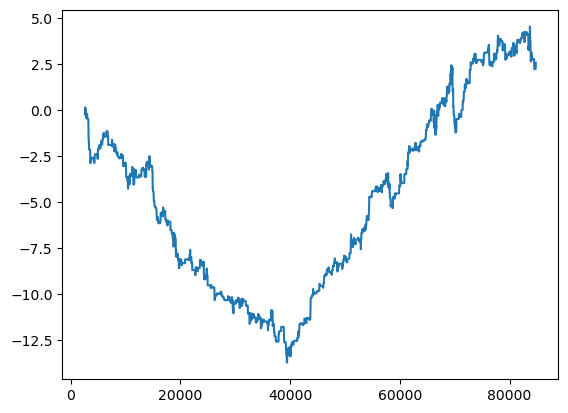

In [45]:
test.loc[test['Ticker']=='AAPL','Strat_Pnl'].dropna().cumsum().plot()

In [43]:
test.loc[test['Ticker']=='AAPL','Strat_Pnl']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
84788   NaN
84789   NaN
84790   NaN
84791   NaN
84792   NaN
Name: Strat_Pnl, Length: 84793, dtype: float64

<Axes: >

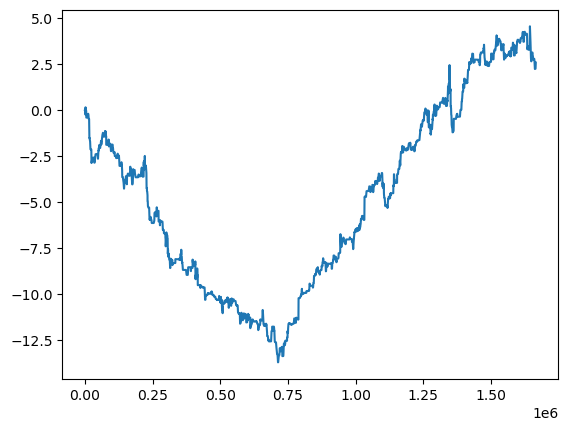

In [42]:
strat_pnl.loc[strat_pnl['Symbol']=='AAPL','Open_to_Date_Return'].cumsum().plot()

In [44]:
strat_pnl.loc[strat_pnl['Symbol']=='AAPL','Open_to_Date_Return']

0         -0.001117
83        -0.002235
166        0.001117
249        0.002235
332       -0.001117
             ...   
1665666    0.013985
1665708    0.013985
1665750    0.015314
1665792    0.016173
1665834    0.012657
Name: Open_to_Date_Return, Length: 18245, dtype: float64

In [22]:
strat_pnl_summary = strat_pnl.groupby(['year','Time']).describe().droplevel(0,axis=1)[['mean','std','min','max']].unstack()

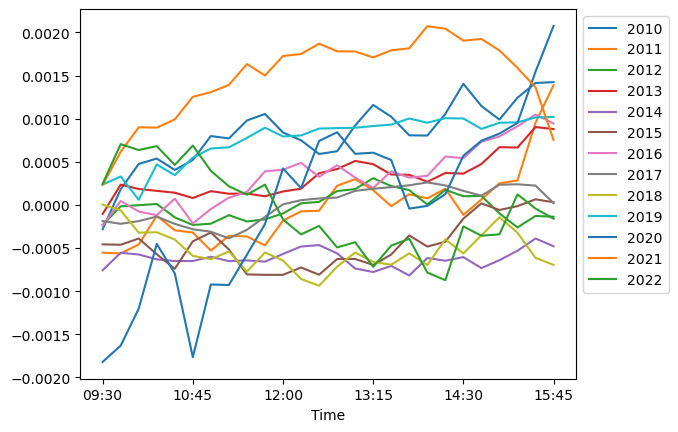

In [23]:
strat_pnl_summary['mean'].T.plot().legend(bbox_to_anchor=(1, 1))

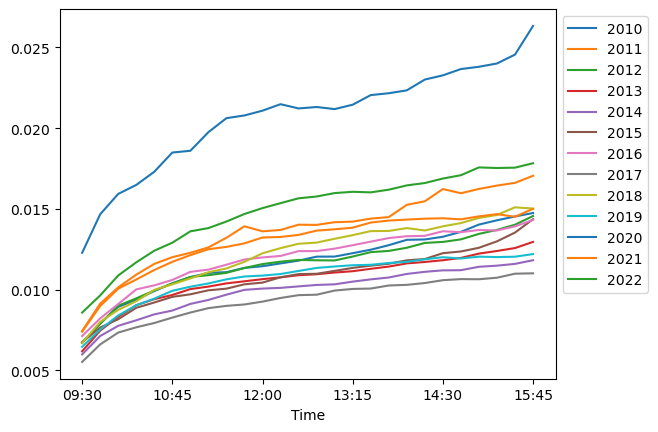

In [24]:
strat_pnl_summary['std'].T.plot().legend(bbox_to_anchor=(1, 1))

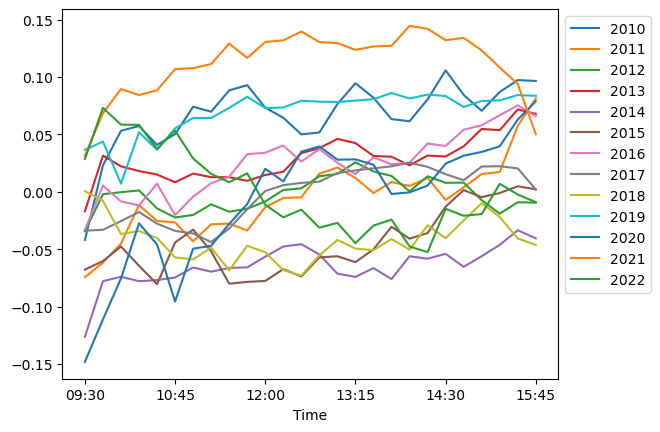

In [25]:
(strat_pnl_summary['mean']/strat_pnl_summary['std']).T.plot().legend(bbox_to_anchor=(1, 1))

In [26]:
strat_pnl.groupby(['year','Time'])['Open_to_Date_Return'].count().groupby('year').mean().round()

year
2010    2812.0
2011    5196.0
2012    3894.0
2013    4972.0
2014    5137.0
2015    5120.0
2016    4992.0
2017    5201.0
2018    5673.0
2019    4899.0
2020    5796.0
2021    5063.0
2022    5318.0
Name: Open_to_Date_Return, dtype: float64

<Axes: xlabel='Day'>

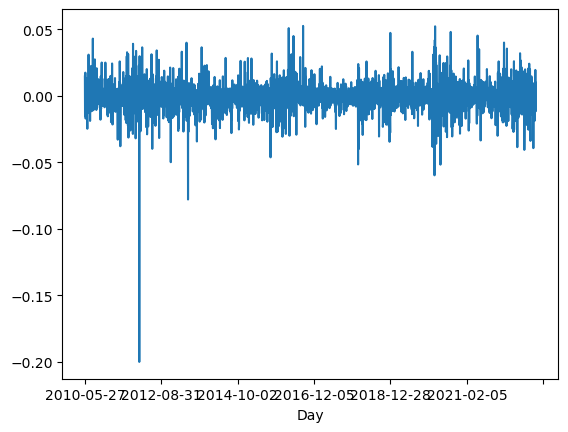

In [27]:
strat_pnl.groupby(['Day','Time'])['Open_to_Date_Return'].mean().unstack()['15:45'].plot()

In [29]:
for i in ['09:30', '09:45', '10:00', '10:15', '10:30', '10:45', '11:00', '11:15','11:30', '11:45', '12:00', '12:15', '12:30', '12:45', '13:00', '13:15',
       '13:30', '13:45', '14:00', '14:15', '14:30', '14:45', '15:00', '15:15','15:30', '15:45']:
    print(i,sum(strat_pnl.groupby(['Day','Time'])['Open_to_Date_Return'].mean().unstack()[i]>0)/len(strat_pnl.groupby(['Day','Time'])['Open_to_Date_Return'].mean().unstack()[i]))

09:30 0.4356368563685637
09:45 0.4634146341463415
10:00 0.4657859078590786
10:15 0.48001355013550134
10:30 0.481029810298103
10:45 0.4905149051490515
11:00 0.4874661246612466
11:15 0.49254742547425473
11:30 0.48577235772357724
11:45 0.4932249322493225
12:00 0.48949864498644985
12:15 0.494579945799458
12:30 0.49661246612466126
12:45 0.49762872628726285
13:00 0.4969512195121951
13:15 0.49898373983739835
13:30 0.5023712737127372
13:45 0.5030487804878049
14:00 0.5040650406504065
14:15 0.5030487804878049
14:30 0.5020325203252033
14:45 0.5044037940379403
15:00 0.5050813008130082
15:15 0.49830623306233063
15:30 0.5040650406504065
15:45 0.49254742547425473
